In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sammon import sammon
from sklearn.decomposition import PCA
import matplotlib as mpl

In [2]:
def load_from_csv(filename):
    """
    Loads a CSV file into a pandas dataframe.
    """
    return pd.read_csv(filename)

In [4]:
def load_from_npy(filename):
    """
    Loads a NPY file into a pandas dataframe.
    """
    return np.load(filename)

In [5]:
def run_PCA(data, labels, n_components=2):
    """
    Runs PCA on the data.
    """
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
    principalDf['label'] = labels
    return principalDf

In [19]:
def plot_stuff(train_PCA, labels):
    """
    Plots the PCA results.
    """
    N = len(set(labels))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    x = train_PCA[0]
    y = train_PCA[1]
    tag = train_PCA['label']

    cmap = plt.cm.jet
    cmpalist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmpalist, cmap.N)

    bounds = np.linspace(0, N, N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    scat = ax.scatter(x, y, c=tag, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)
    cb.set_label('Custom cbar')
    ax.set_title('PCA')
    plt.show()

In [7]:
def run_sammon(data, labels, n_components=2):
    """
    Runs Sammon on the data.
    """
    new_data = data.to_numpy()
    new_data = np.delete(new_data, -1, axis=1)
    [y_new, E] = sammon(new_data, n_components)
    y_new = pd.DataFrame(y_new)
    y_new['label'] = labels
    return y_new

(600, 31)
            0           1           2           3           4           5  \
0    4.635955 -622.048021 -370.896856  245.854525  150.926779  953.095003   
1 -119.624537   97.227669 -600.441128   88.446909  293.603384 -306.400070   
2  326.369723  987.910681  407.175371  271.532505  151.345396 -267.481477   
3 -777.797042 -213.931850  -65.598163  236.242284 -233.500268   72.672497   
4 -591.544509 -360.160164    2.541853  301.914590  -65.276653 -115.195927   

            6           7           8           9  ...          21  \
0  -21.772001 -405.626056 -429.631998 -445.040291  ...  102.421538   
1  -28.581045 -570.525535 -342.921634 -435.329563  ... -201.240502   
2 -251.879595   45.674096 -218.445862  200.425062  ... -269.706108   
3  222.776593  165.802651 -328.016685  -46.314278  ...   79.285161   
4  806.837746   -3.310721  -77.377682 -283.964499  ...  298.696471   

           22          23          24          25          26          27  \
0   30.151724 -203.777051  -4

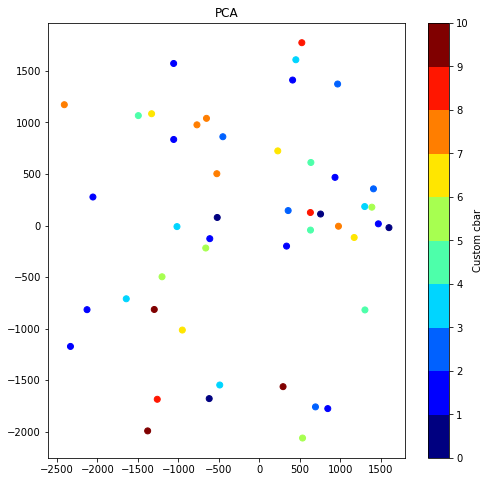

In [21]:
dataset = load_from_csv('Datasets/mnist_test.csv')
train_data = dataset.sample(n=600, random_state=42)
# print(train_data.shape)
# print(train_data.head())
labels = train_data['label']
# print(labels)
# print(set(labels))
train_data = train_data.drop(columns=['label'])
# print(train_data.shape)
# print(train_data.head())
train_PCA = run_PCA(train_data, labels, 30)
print(train_PCA.shape)
print(train_PCA.head())
smapping = run_sammon(train_PCA, labels, 2)
plot_stuff(smapping, labels)



      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
6252    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4684    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1731    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4742    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4521    0    0    0    0    0    0    0    0    0     0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
6252      0      0      0      0      0      0      0      0  
4684      0      0      0      0      0      0      0      0  
1731      0      0      0      0      0      0      0      0  
4742      0      0      0      0      0      0      0      0  
4521      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]
      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
6252    0    0    0    0    0    0    0    0    0  

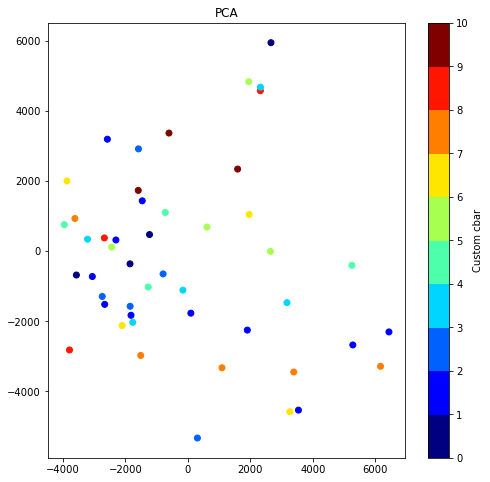

In [23]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
print(train_data.head())
X_transformed = embedding.fit_transform(train_data)
print(train_data.head())
X_transformed.shape
X_transformed = pd.DataFrame(X_transformed)
X_transformed['label'] = labels
print(X_transformed)
plot_stuff(X_transformed, labels)
